In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [13]:
# Load datasets
games = pd.read_csv("./Data/games.csv")
ranking = pd.read_csv("./Data/ranking.csv")
teams = pd.read_csv("./Data/teams.csv")  


# Display first few rows
print("Games Dataset:\n", games.head())
print("\nRanking Dataset:\n", ranking.head())
print("\nTeams Dataset:\n", teams.head())

# Display the shape of the datasets
print("\nGames Dataset Shape:", games.shape)
print("Ranking Dataset Shape:", ranking.shape)
print("Teams Dataset Shape:", teams.shape)


Games Dataset:
   GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT

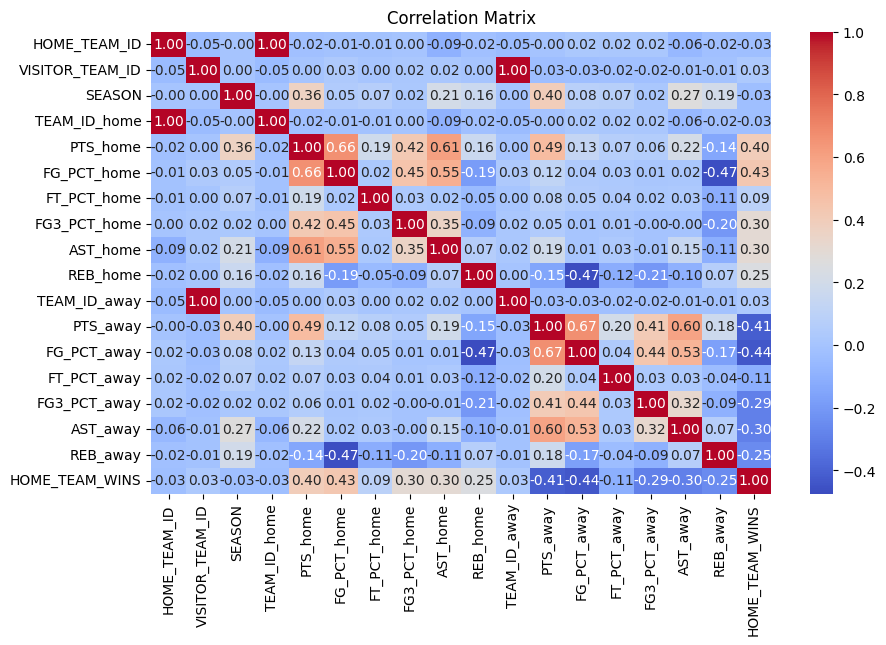

In [16]:
# Correlation heatmap for numerical features
ndata = games[games.columns[3:]]
# print(ndata.head())

plt.figure(figsize=(10, 6))
correlation_matrix = ndata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [21]:
# Merge datasets

# Select only the necessary columns
teams = teams[['TEAM_ID', 'ABBREVIATION', 'NICKNAME', 'CITY']]
games = games[['GAME_ID', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away','FG_PCT_home','FG_PCT_away', 'GAME_DATE_EST','HOME_TEAM_WINS']]
ranking = ranking[['TEAM_ID', 'SEASON_ID', 'STANDINGSDATE', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD']]


# Merge for home team
games = pd.merge(games, teams,  left_on='TEAM_ID_home', right_on='TEAM_ID',  how='left')
games = games.rename(columns={'ABBREVIATION': 'HOME_TEAM_ABBREVIATION', 'NICKNAME': 'HOME_TEAM_NICKNAME', 'CITY': 'HOME_TEAM_CITY'})

# Merge for away team
games = pd.merge(games, teams, left_on='TEAM_ID_away', right_on='TEAM_ID',  how='left')
games = games.rename(columns={'ABBREVIATION': 'Away_TEAM_ABBREVIATION', 'NICKNAME': 'Away_TEAM_NICKNAME', 'CITY': 'Away_TEAM_CITY'})

# Drop redundant columns
games = games.drop(columns=['TEAM_ID_x', 'TEAM_ID_y'])


# Convert date columns to datetime format
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE_EST'])
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])

# merge games and ranking
games = pd.merge(games, ranking, left_on=['TEAM_ID_home', 'GAME_DATE'], right_on=['TEAM_ID', 'STANDINGSDATE'], how='left')
games = games.rename(columns={'G': 'G_home', 'W': 'W_home', 'L': 'L_home', 'W_PCT': 'W_PCT_home', 'HOME_RECORD': 'HOME_RECORD_home', 'ROAD_RECORD': 'ROAD_RECORD_home'})
games = games.drop(columns=['TEAM_ID'])

games = pd.merge(games, ranking, left_on=['TEAM_ID_away', 'GAME_DATE'], right_on=['TEAM_ID', 'STANDINGSDATE'], how='left')
games = games.rename(columns={'G': 'G_away', 'W': 'W_away', 'L': 'L_away', 'W_PCT': 'W_PCT_away', 'HOME_RECORD': 'HOME_RECORD_away', 'ROAD_RECORD': 'ROAD_RECORD_away'})
games = games.drop(columns=['TEAM_ID'])

# Drop redundant columns
games = games.drop(columns=['GAME_DATE', 'STANDINGSDATE_x', 'STANDINGSDATE_y', 'GAME_DATE_EST'])

# Display the merged dataset
print("\nMerged Dataset:\n", games.head())



Merged Dataset:
     GAME_ID  TEAM_ID_home  TEAM_ID_away  PTS_home  PTS_away  FG_PCT_home  \
0  22200477    1610612740    1610612759     126.0     117.0        0.484   
1  22200478    1610612762    1610612764     120.0     112.0        0.488   
2  22200466    1610612739    1610612749     114.0     106.0        0.482   
3  22200467    1610612755    1610612765     113.0      93.0        0.441   
4  22200468    1610612737    1610612741     108.0     110.0        0.429   

   FG_PCT_away  HOME_TEAM_WINS HOME_TEAM_ABBREVIATION HOME_TEAM_NICKNAME  ...  \
0        0.478               1                    NOP           Pelicans  ...   
1        0.561               1                    UTA               Jazz  ...   
2        0.470               1                    CLE          Cavaliers  ...   
3        0.392               1                    PHI              76ers  ...   
4        0.500               0                    ATL              Hawks  ...   

  W_PCT_home HOME_RECORD_home ROAD_REC

In [22]:
games

,GAME_ID,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,FG_PCT_home,FG_PCT_away,HOME_TEAM_WINS,HOME_TEAM_ABBREVIATION,HOME_TEAM_NICKNAME,...,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,SEASON_ID_y,G_away,W_away,L_away,W_PCT_away,HOME_RECORD_away,ROAD_RECORD_away
0,22200477,1610612740,1610612759,126.0,117.0,0.484,0.478,1,NOP,Pelicans,...,0.613,13-4,6-8,22022,31,10,21,0.323,5-12,5-9
1,22200478,1610612762,1610612764,120.0,112.0,0.488,0.561,1,UTA,Jazz,...,0.543,12-5,7-11,22022,33,12,21,0.364,8-7,4-14
2,22200466,1610612739,1610612749,114.0,106.0,0.482,0.470,1,CLE,Cavaliers,...,0.667,16-2,6-9,22022,31,22,9,0.710,14-3,8-6
3,22200467,1610612755,1610612765,113.0,93.0,0.441,0.392,1,PHI,76ers,...,0.600,13-5,5-7,22022,34,8,26,0.235,4-12,4-14
4,22200468,1610612737,1610612741,108.0,110.0,0.429,0.500,0,ATL,Hawks,...,0.500,10-6,6-10,22022,31,13,18,0.419,7-7,6-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,11400007,1610612737,1610612740,93.0,87.0,0.419,0.366,1,ATL,Hawks,...,1.000,1-0,0-0,12014,2,1,1,0.500,0-0,1-1
27157,11400004,1610612741,1610612764,81.0,85.0,0.338,0.411,0,CHI,Bulls,...,0.000,0-1,0-0,12014,1,1,0,1.000,0-0,1-0
27158,11400005,1610612747,1610612743,98.0,95.0,0.448,0.387,1,LAL,Lakers,...,1.000,1-0,0-0,12014,1,0,1,0.000,0-0,0-1
27159,11400002,1610612761,1610612758,99.0,94.0,0.440,0.469,1,TOR,Raptors,...,1.000,1-0,0-0,12014,1,0,1,0.000,0-0,0-1
